In [45]:
import hashlib
import math
from PIL import Image, ImageDraw
from IPython.display import display

Input a string: randomyeast


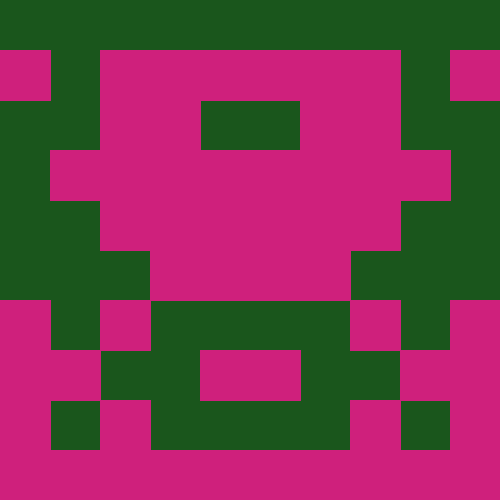

In [52]:
input_str = input("Input a string: ").encode("utf8")
#input_str = "myteststring".encode("utf8")
#print(f"input string: {input_str}")

image_size = 10 # generated identicon size is image_size * square_size
square_size = 50

getMD5 = hashlib.md5()
getMD5.update(input_str)
hash1 = getMD5.hexdigest()
getMD5.update(hash1.encode("utf8"))
hash2 = getMD5.hexdigest()
#print(f"string converted to md5 hash: {hash1}, {hash2}")

fgc = tuple([int(x, 16) for x in (hash1[0:2], hash1[2:4], hash1[4:6])])
bgc = tuple([int(x, 16) for x in (hash2[-2:], hash2[-4:-2], hash2[-6:-4])])
#print(f"foreground color is: {fgc}, background color is: {bgc}")

identicon = Image.new('RGB', (image_size * square_size, image_size * square_size), bgc)
draw = ImageDraw.Draw(identicon)
short_hash = hash1[6:]+hash2[6:]
hash_list = [int(x, 16) for x in short_hash]
#print(f"length of remaining hash is: {len(short_hash)}")

for x in range(int(image_size/2)):
    for y in range(int(image_size)):
        #index = int((image_size/2-x) * image_size + (image_size-y))-10
        index = x * image_size + y+1
        if hash_list[index] & 1:
            #Draw the left side
            draw.rectangle((x*square_size, y*square_size, (x+1)*square_size, (y+1)*square_size), fill=fgc, outline=fgc)
            #Draw the mirror side
            draw.rectangle(((image_size-x)*square_size, y*square_size, (image_size-(x+1))*square_size, (y+1)*square_size),fill=fgc, outline=fgc)

#identicon.save(hash1+'.png', 'PNG')
display(identicon)